6. In this exercise, you will further analyze the Wage data set.

a) Perform polynomial regression to predict wage using age.  Use cross-validation to select the optimal degree d for the polynomial.  What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA?  Make a plot of the resulting polynomial fit to the data.

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

In [2]:
direct = os.getcwd()
wage = pd.read_csv(os.path.join(direct, 'Wage.csv'))

In [3]:
forPoly = wage[['age', 'wage']]

In [4]:
#power transformation of age

for i in range(2, 9):
    title = 'age_'+str(i)
    forPoly[title] = forPoly['age'].apply(lambda x: x**i)

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
y = 'wage'
x_cols = ['age', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8']

In [6]:
scoreDict = {}
for i in range(0, len(x_cols)):
    x = x_cols[:i+1]
    power = len(x)
    model = linreg()
    scores = cross_val_score(model, forPoly[x], forPoly[y], scoring='neg_mean_squared_error', cv=5)
    scoreDict[power] = (scores.mean(), scores.std())
    
scoreDict

{1: (-1675.0142380530044, 123.9875228504669),
 2: (-1599.5982268539042, 112.62008740995638),
 3: (-1594.7262162596148, 113.99114327311892),
 4: (-1593.9141039094982, 112.86284534297835),
 5: (-1595.4331311183337, 110.63059622813319),
 6: (-1594.9303544611391, 110.09988892815258),
 7: (-1598.9475886754885, 105.23365200931951),
 8: (-1599.5196353959443, 105.1444072060882)}

****Answer:****  Based on cross validation, we will use a 4th power polynomial regression.

In [7]:
model = sm.OLS(forPoly[y], sm.add_constant(forPoly[['age', 'age_2']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.82e-56
Time:                        10:17:50   Log-Likelihood:                -15321.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2997   BIC:                         3.067e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4252      8.190     -1.273      0.2

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
model = sm.OLS(forPoly[y], sm.add_constant(forPoly[['age', 'age_2', 'age_3']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     92.89
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.75e-57
Time:                        10:17:51   Log-Likelihood:                -15316.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2996   BIC:                         3.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.2439     22.184     -3.392      0.0

In [9]:
model = sm.OLS(forPoly[y], sm.add_constant(forPoly[['age', 'age_2', 'age_3', 'age_4']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.77e-57
Time:                        10:17:51   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

In [10]:
model = sm.OLS(forPoly[y], sm.add_constant(forPoly[['age', 'age_2', 'age_3', 'age_4', 'age_5']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     56.71
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.67e-56
Time:                        10:17:51   Log-Likelihood:                -15314.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2994   BIC:                         3.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.7046    161.435     -0.308      0.7

****Answer:**** Similar to CV, ANOVA selects 4 (if you tighten the threshold, it would select 3 only), but it's close enough.  After 4, no variable is useful.

In [19]:
from sklearn.model_selection import cross_validate

mod = linreg()
model = cross_validate(mod, forPoly[['age', 'age_2', 'age_3', 'age_4']], forPoly[y], cv=5, return_estimator=True)
mod.fit(forPoly[['age', 'age_2', 'age_3', 'age_4']], forPoly[y])

estimates = {'B0':[], 'B1':[], 'B2':[], 'B3':[], 'B4':[]}
for m in model['estimator']:
    estimates['B0'].append(m.intercept_)
    estimates['B1'].append(m.coef_[0])
    estimates['B2'].append(m.coef_[1])
    estimates['B3'].append(m.coef_[2])
    estimates['B4'].append(m.coef_[3])

coefs = {}
for key, val in estimates.items():
    avg = sum(val)/len(val)
    print(key, ':', avg)
    coefs[key] = avg

B0 : -183.9197720661404
B1 : 21.223552067877268
B2 : -0.563068544017493
B3 : 0.006797994727134667
B4 : -3.19625086576858e-05


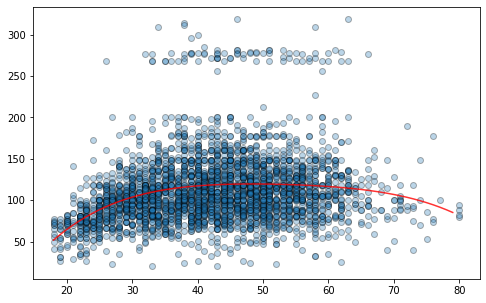

In [20]:
from sklearn.preprocessing import PolynomialFeatures

fig, ax1 = plt.subplots(1,1, figsize = (8,5));
ax1.scatter(forPoly.age, forPoly.wage, edgecolor='k', alpha=0.3);

age_grid = np.arange(forPoly.age.min(), forPoly.age.max()).reshape(-1,1)
forPred = PolynomialFeatures(4).fit_transform(age_grid)[:, 1:]

preds = mod.predict(forPred)
ax1.plot(age_grid, preds, color = 'r', alpha=.8)

b) Fit a step function to predict wage using age, and perform cross validation to choose the optimal number of cuts.  Make a plot of the fit obtained.

In [21]:
n = 4
cuts, bins = pd.cut(forPoly.age, n, retbins=True, right=True)
cuts.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [22]:
steps = pd.concat([forPoly.age, cuts, forPoly.wage], keys=['age', 'cuts', 'wage'], axis=1)
steps_dummies = pd.get_dummies(steps['cuts'])
steps_dummies = steps_dummies.drop(steps_dummies.columns[0], axis=1)
#steps_dummies

In [23]:
mod = linreg()
model = cross_validate(mod, steps_dummies, forPoly[y], cv=5, return_estimator=True)
mod.fit(steps_dummies, forPoly[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

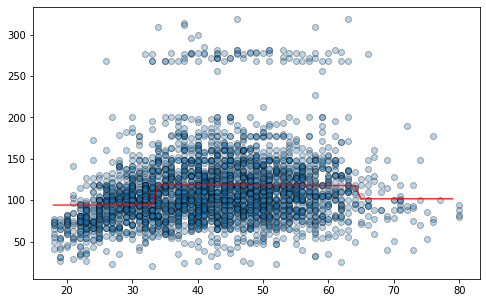

In [24]:
from sklearn.preprocessing import PolynomialFeatures

fig, ax1 = plt.subplots(1,1, figsize = (8,5));
ax1.scatter(forPoly.age, forPoly.wage, edgecolor='k', alpha=0.3);

age_grid = np.arange(forPoly.age.min(), forPoly.age.max()).reshape(-1,1)
mapping = np.digitize(age_grid.ravel(), bins)
forPred = pd.get_dummies(mapping).drop(1, axis=1)

preds = mod.predict(forPred)
ax1.plot(age_grid, preds, color = 'r', alpha=.8)

***

9. Using the Boston data set, dis as the parameter, and nox as the response...

a) Fit a cubic polynomial regression to predict nox using dis.  Report the output and plot the resulting data and fits

In [25]:
direct = os.getcwd()
boston = pd.read_csv(os.path.join(direct, 'Boston.csv'))

In [26]:
forPoly = boston[['nox', 'dis']]

for i in range(2,4):
    title = 'dis_'+str(i)
    forPoly[title] = forPoly['dis'].apply(lambda x: x**i)

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
mod = linreg()
model = cross_validate(mod, forPoly[['dis','dis_2', 'dis_3']], forPoly['nox'], cv=5)
mod.fit(forPoly[['dis','dis_2', 'dis_3']], forPoly['nox'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

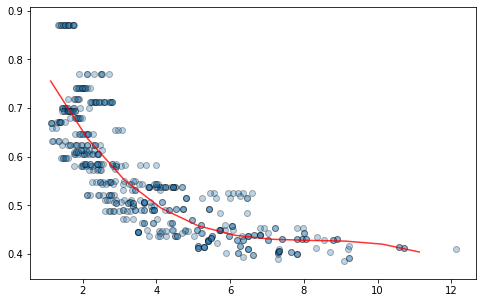

In [28]:
from sklearn.preprocessing import PolynomialFeatures

fig, ax1 = plt.subplots(1,1, figsize = (8,5));
ax1.scatter(forPoly.dis, forPoly.nox, edgecolor='k', alpha=0.3);

x_grid = np.arange(forPoly.dis.min(), forPoly.dis.max()).reshape(-1,1)
forPred = PolynomialFeatures(3).fit_transform(x_grid)[:, 1:]

preds = mod.predict(forPred)
ax1.plot(x_grid, preds, color = 'r', alpha=.8)

b)  Plot the fits for a range of different polynomial degrees, (1-8), and report the associated RSS

c)  Perform cross validation to select the optimal degree for the polynomial and explain the results

In [29]:
forPoly = boston[['nox', 'dis']]
for i in range(2,9):
    title = 'dis_'+str(i)
    forPoly[title] = forPoly['dis'].apply(lambda x: x**i)

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
y = 'nox'
cols = forPoly.columns
x_cols = list(cols.drop(y))

In [31]:
scoreDict = {}
for i in range(0, len(x_cols)):
    x = x_cols[:i+1]
    power = len(x)
    model = linreg()
    scores = cross_val_score(model, forPoly[x], forPoly[y], scoring='neg_mean_squared_error', cv=5)
    scoreDict[power] = (scores.mean(), scores.std())
    
scoreDict

{1: (-0.006032109223148161, 0.00265591203149929),
 2: (-0.004570384881436259, 0.0025854631150643284),
 3: (-0.004647367459422973, 0.002665001269887665),
 4: (-0.004756118478675325, 0.002853131208133505),
 5: (-0.004969650255232452, 0.0032225469399808355),
 6: (-0.022083323900809602, 0.03450558651301575),
 7: (-0.0860110446489043, 0.1621911298904986),
 8: (-2.4179944043728776, 4.825757302687981)}

****Answer:**** A power of 2 is the lowest MSE

d) Fit a regression spline to predict nox using dis.  Report the output for the fit using four degrees of freedom.  How were the knots chosen?  Plot the fit

In [33]:
# split data into bins
cut, bins = pd.cut(boston['dis'], 4, retbins=True, right=True)

steps = pd.concat([boston['dis'], cut, boston['nox']], keys=['dis', 'cuts', 'nox'], axis=1)
dummies = pd.get_dummies(cut)

In [39]:
x = dummies.drop(dummies.columns[0], axis=1)

In [40]:
mod = linreg()
model = cross_validate(mod, x, boston['nox'], cv=5)
mod.fit(x, boston['nox'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(boston['nox'], mod.predict(x))

0.006841227818753076

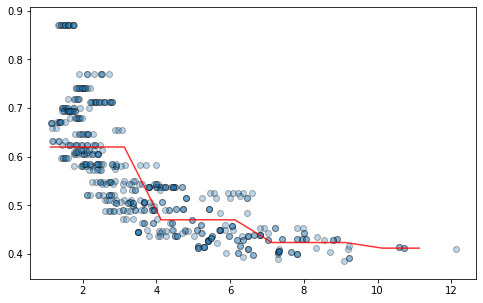

In [46]:
from sklearn.preprocessing import PolynomialFeatures

fig, ax1 = plt.subplots(1,1, figsize = (8,5));
ax1.scatter(boston.dis, boston.nox, edgecolor='k', alpha=0.3);

x_grid = np.arange(boston.dis.min(), boston.dis.max()).reshape(-1,1)
mapping = np.digitize(x_grid.ravel(), bins)
forPred = pd.get_dummies(mapping).drop(1, axis=1)

preds = mod.predict(forPred)
ax1.plot(x_grid, preds, color='r', alpha=.8)

e) Fit a regression spline for a range of df and plot the resulting fits and report the RSS for each.  Describe the results.

f) Perform cross validation or another approach in order to select the best degrees of freedom for a regression spline on this data.  Describe the results.

10.  This question uses the College data set

a) Split the data into a training and test set.  Using out of state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [61]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split as tts

In [55]:
direct = os.getcwd()
college = pd.read_csv(os.path.join(direct, 'College.csv'))
college.rename(columns={'Unnamed: 0':'College'}, inplace = True)

In [68]:
df_y = college['Outstate']

college['private_io'] = college['Private'].apply(lambda x: 1 if x=='Yes' else 0)
cols = college.columns
x_cols = cols.drop(['Outstate', 'College', 'Private'])
df_x = college[x_cols]

In [69]:
x_train, x_test, y_train, y_test = tts(df_x, df_y, random_state=1)

In [71]:
for col in x_cols:
    model = sm.OLS(y_train, sm.add_constant(x_train[col])).fit()
    print(model.summary())
    print('\n------------------------------------------------\n')

C:\Users\joepo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.734
Date:                Tue, 15 Sep 2020   Prob (F-statistic):              0.188
Time:                        10:54:20   Log-Likelihood:                -5657.1
No. Observations:                 582   AIC:                         1.132e+04
Df Residuals:                     580   BIC:                         1.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.026e+04    210.997     48.639      0.0

strong multicollinearity or other numerical problems.

------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     49.56
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           5.46e-12
Time:                        10:54:20   Log-Likelihood:                -5634.1
No. Observations:                 582   AIC:                         1.127e+04
Df Residuals:                     580   BIC:                         1.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

------------------------------------------------



0.443 is best Adj R-Squared using Room.Board as the variable

In [77]:
keep_cols = ['Room.Board']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

['Apps', 'Room.Board']
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     232.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           6.24e-75
Time:                        10:59:03   Log-Likelihood:                -5486.2
No. Observations:                 582   AIC:                         1.098e+04
Df Residuals:                     579   BIC:                         1.099e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -389.4039    519.

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           4.00e-80
Time:                        10:59:04   Log-Likelihood:                -5474.2
No. Observations:                 582   AIC:                         1.095e+04
Df Residuals:                     579   BIC:                         1.097e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1385.0689    616.263      2.248      0.0

Adj R-Squared of 0.592 was highest by adding perc.alumni

In [78]:
keep_cols = ['Room.Board', 'perc.alumni']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     280.8
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.11e-112
Time:                        11:00:23   Log-Likelihood:                -5396.3
No. Observations:                 582   AIC:                         1.080e+04
Df Residuals:                     578   BIC:                         1.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1648.0165    454.109     -3.629      

strong multicollinearity or other numerical problems.

------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     298.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          5.90e-117
Time:                        11:00:23   Log-Likelihood:                -5385.8
No. Observations:                 582   AIC:                         1.078e+04
Df Residuals:                     578   BIC:                         1.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

0.662 was highest with adding Expend

In [79]:
keep_cols = ['Room.Board', 'perc.alumni', 'Expend']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     295.4
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          4.41e-138
Time:                        11:01:27   Log-Likelihood:                -5333.6
No. Observations:                 582   AIC:                         1.068e+04
Df Residuals:                     577   BIC:                         1.070e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -854.0788    413.616     -2.065      

strong multicollinearity or other numerical problems.

------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     286.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.30e-135
Time:                        11:01:27   Log-Likelihood:                -5340.0
No. Observations:                 582   AIC:                         1.069e+04
Df Residuals:                     577   BIC:                         1.071e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

0.72 was highest by adding private_io

In [80]:
keep_cols = ['Room.Board', 'perc.alumni', 'Expend', 'private_io']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     301.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          3.45e-158
Time:                        11:02:22   Log-Likelihood:                -5283.8
No. Observations:                 582   AIC:                         1.058e+04
Df Residuals:                     576   BIC:                         1.061e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1088.2055    380.676     -2.859      

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     336.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.31e-168
Time:                        11:02:22   Log-Likelihood:                -5260.1
No. Observations:                 582   AIC:                         1.053e+04
Df Residuals:                     576   BIC:                         1.056e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3581.7454    506.359     -7.074      

Add PhD, all variables still under the p-value threshold

In [83]:
keep_cols = ['Room.Board', 'perc.alumni', 'Expend', 'private_io', 'PhD']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        print(col)
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

Apps
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     280.9
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.69e-167
Time:                        11:05:48   Log-Likelihood:                -5259.6
No. Observations:                 582   AIC:                         1.053e+04
Df Residuals:                     575   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3566.6545    506.575     -7.041 

strong multicollinearity or other numerical problems.

------------------------------------------------

Books
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     282.1
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          1.11e-167
Time:                        11:05:48   Log-Likelihood:                -5258.7
No. Observations:                 582   AIC:                         1.053e+04
Df Residuals:                     575   BIC:                         1.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

add Grad.Rate, all variables still under p-value

In [84]:
keep_cols = ['Room.Board', 'perc.alumni', 'Expend', 'private_io', 'PhD', 'Grad.Rate']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        print(col)
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

Apps
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     252.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          1.64e-170
Time:                        11:06:27   Log-Likelihood:                -5249.1
No. Observations:                 582   AIC:                         1.051e+04
Df Residuals:                     574   BIC:                         1.055e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4214.8006    517.732     -8.141 

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     253.2
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          6.79e-171
Time:                        11:06:27   Log-Likelihood:                -5248.2
No. Observations:                 582   AIC:                         1.051e+04
Df Residuals:                     574   BIC:                         1.055e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4059.6344    527.334     -7.698      

Add Personal

In [85]:
keep_cols = ['Room.Board', 'perc.alumni', 'Expend', 'private_io', 'PhD', 'Grad.Rate', 'Personal']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        print(col)
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

Apps
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     224.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          5.18e-171
Time:                        11:07:03   Log-Likelihood:                -5245.1
No. Observations:                 582   AIC:                         1.051e+04
Df Residuals:                     573   BIC:                         1.055e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3429.8874    584.760     -5.865 

strong multicollinearity or other numerical problems.

------------------------------------------------

Books
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.62e-171
Time:                        11:07:03   Log-Likelihood:                -5244.4
No. Observations:                 582   AIC:                         1.051e+04
Df Residuals:                     573   BIC:                         1.055e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

add S.F.Ratio

In [86]:
keep_cols = ['Room.Board', 'perc.alumni', 'Expend', 'private_io', 'PhD', 'Grad.Rate', 'Personal', 'S.F.Ratio']
for col in x_cols:
    mod_col = []
    if col in keep_cols:
        pass
    else:
        print(col)
        mod_col.append(col)
        mod_col.extend(keep_cols)
        model = sm.OLS(y_train, sm.add_constant(x_train[mod_col])).fit()
        print(model.summary())
        print('\n------------------------------------------------\n')

Apps
                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          7.27e-171
Time:                        11:07:50   Log-Likelihood:                -5242.7
No. Observations:                 582   AIC:                         1.051e+04
Df Residuals:                     572   BIC:                         1.055e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2170.9161    816.921     -2.657 

                            OLS Regression Results                            
Dep. Variable:               Outstate   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          4.18e-171
Time:                        11:07:50   Log-Likelihood:                -5242.1
No. Observations:                 582   AIC:                         1.050e+04
Df Residuals:                     572   BIC:                         1.055e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1995.1948    831.145     -2.401      

Final variables are 'Room.Board', 'perc.alumni', 'Expend', 'private_io', 'PhD', 'Grad.Rate', 'Personal', 'S.F.Ratio'

b)  Fit a GAM on the training data, using out of stat tuition as the response and the features selected in the previous step as the predictors.  Plot the results, and explain your findings.

In [96]:
from pygam import LinearGAM as lGAM
gam = lGAM().fit(x_train, y_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    142.3954
Link Function:                     IdentityLink Log Likelihood:                                 -9140.9518
Number of Samples:                          582 AIC:                                            18568.6944
                                                AICc:                                            18663.326
                                                GCV:                                          4617145.5759
                                                Scale:                                        2642309.9866
                                                Pseudo R-Squared:                                   0.8774
Feature Function                  Lam

C:\Users\joepo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  This is separate from the ipykernel package so we can avoid doing imports until


c)  Evaluate the model obtained on the test set, and explain the results

In [102]:
preds = gam.predict(x_test)
mse(preds, y_test)

5870738.546810976

d)  For which varialbes, if any, is there evidence of a non-linear relationship with the response.

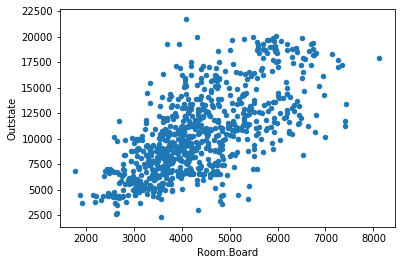

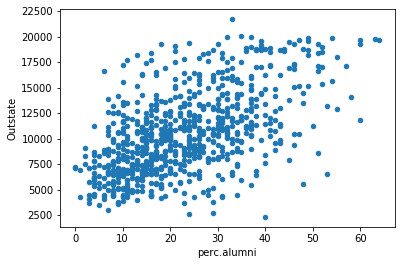

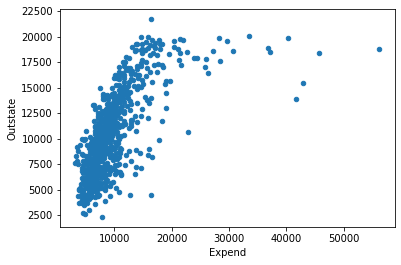

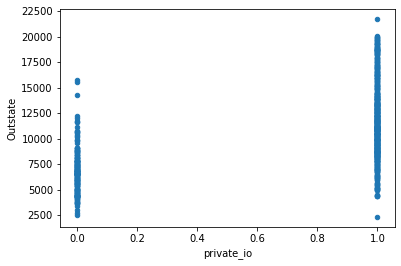

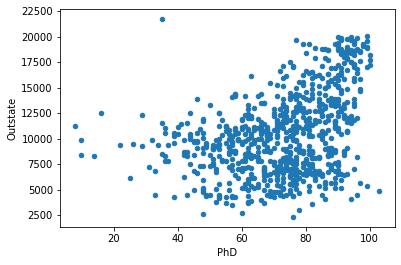

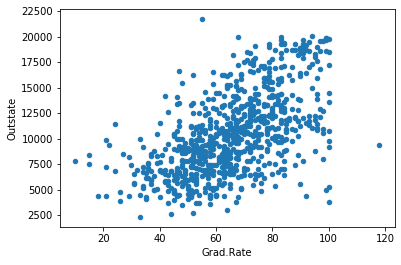

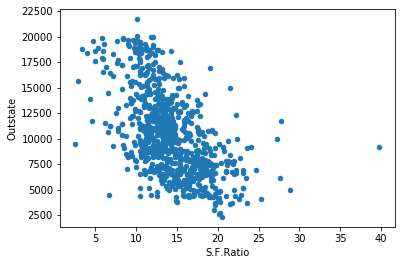

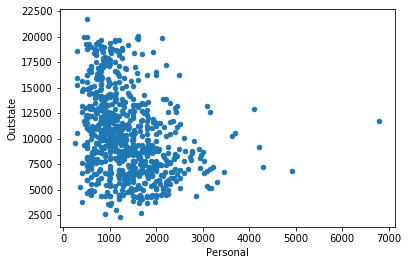

In [118]:
college.plot(x='Room.Board', y='Outstate', kind='scatter');

college.plot(x='perc.alumni', y='Outstate', kind='scatter');

college.plot(x='Expend', y='Outstate', kind='scatter');

college.plot(x='private_io', y='Outstate', kind='scatter');

college.plot(x='PhD', y='Outstate', kind='scatter');

college.plot(x= 'Grad.Rate', y='Outstate', kind='scatter');

college.plot(x= 'S.F.Ratio', y='Outstate', kind='scatter');

college.plot(x= 'Personal', y='Outstate', kind='scatter');

PhD and possibly S.F.Ratio seem to have a nonlinear relationship with Outstate tutition

11.  GAMs are generally fit using a backfitting approach.  This will explore that concept with multiple linear regression.

Suppose that we would like to perform multiple linear regression, but don't have software to do so.  Instead we only have software for simple linear regression.  We will iterate through the following approach.  We repeatedly hold all but one coefficient estimate fixed at its current value, and update only that coefficient estimate using a simple linear regression.  The process is continued until a convergence (estimates stop changing).

Try it on the following example

a) Generate a response Y and two predictors X1 and X2 with n=100.

In [120]:
n=100
np.random.seed(0)
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(10, 5, n)
error = np.random.normal(0, 0.5, n)

In [123]:
b0 = 1.7
b1 = 0.75
b2 = -.05

In [124]:
df = pd.DataFrame({'X1':x1, 'X2':x2, 'error':error}, columns=['X1', 'X2', 'error'])
df['Y'] = df.apply(lambda row: b0 + b1*row['X1'] + b2*row['X2'] + row['error'], axis=1)

b) Set B1 to a value.

In [125]:
b1_est = 10

c) Keeping B1 fixed, fit the model Y-B1X1 = B0 + B2X2

HINT: create a new variable for the value of Y-B1X1 then create a model based on that value

In [137]:
df['new'] = df.apply(lambda row: row['Y'] - b1_est*row['X1'], axis=1)

In [138]:
model = sm.OLS(df['new'], sm.add_constant(df['X2'])).fit()
print(model.summary())
b2_est = model.params['X2']

                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.861
Date:                Tue, 15 Sep 2020   Prob (F-statistic):              0.176
Time:                        13:17:06   Log-Likelihood:                -364.28
No. Observations:                 100   AIC:                             732.6
Df Residuals:                      98   BIC:                             737.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1595      2.098      1.506      0.1

d) Keeping B2 fixed, fit the model Y-B2X2 = B0+B1X1

In [139]:
df['new'] = df.apply(lambda row: row['Y'] - b2_est*row['X2'], axis=1)

In [150]:
model = sm.OLS(df['new'], sm.add_constant(df['X1'])).fit()
print(model.summary())
b1_est = model.params['X2']

                            OLS Regression Results                            
Dep. Variable:                    new   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     62.37
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           4.20e-12
Time:                        13:23:17   Log-Likelihood:                -154.57
No. Observations:                 100   AIC:                             313.1
Df Residuals:                      98   BIC:                             318.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7039      0.115     32.245      0.0

3.7038796130749403

e)  Write a for loop to repeat c and d 1000 times.  Report the estimates after each loop.  Create a plot in which each of these values is displayed

In [153]:
b_est = 10
df_list = []
for i in range(1, 1001):
    if i%2 > 0:
        df['new'] = df.apply(lambda row: row['Y'] - b_est*row['X1'], axis=1)
        model = sm.OLS(df['new'], sm.add_constant(df['X2'])).fit()
        new_est = model.params['X2']
        intercept = model.params['const']
        params = [i, intercept, b_est, new_est]
        df_list.append(params)
        b_est = new_est
    else:
        df['new'] = df.apply(lambda row: row['Y'] - b_est*row['X2'], axis=1)
        model = sm.OLS(df['new'], sm.add_constant(df['X1'])).fit()
        new_est = model.params['X1']
        intercept = model.params['const']
        params = [i, intercept, new_est, b_est]
        df_list.append(params)
        b_est = new_est


In [154]:
df_list[-1]

[1000, 1.6222839390085118, 0.78340818362377, -0.045571415337537696]

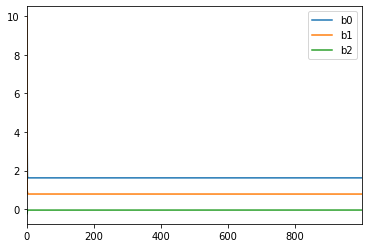

In [160]:
estimates = pd.DataFrame(df_list, columns = ['ix', 'b0', 'b1', 'b2'])
estimates[['b0', 'b1', 'b2']].plot()

f) Compare the answer to the results of simply performing a multiple linear regression to predict Y.

In [162]:
model = sm.OLS(df['Y'], sm.add_constant(df[['X1', 'X2']])).fit()
print(model.params)

const    1.622284
X1       0.783408
X2      -0.045571
dtype: float64


****Answer:**** Estimates are the same

g) How many backfitting iterations were needed to obtain a decent approximation of the estimates?

****Answer:**** About 5